## lectura archivos .nc4

In [1]:
directorio_archivos = 'C:/Users/javoe/Documents/GEO/descargas/'
patron_archivos = '*.hdf.nc4'  # Puedes ajustar el patrón según tus necesidades.

pip install "requieriments.txt"
import netCDF4 as nc4
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import numpy as np

# Ruta al directorio que contiene los archivos netCDF
directorio_archivos = 'C:/Users/javoe/Documents/GEO/descargas/'
# Lista de archivos netCDF en el directorio
archivos_netCDF = [os.path.join(directorio_archivos, nombre_archivo) for nombre_archivo in os.listdir(directorio_archivos) if nombre_archivo.endswith('.nc4')]

# Lista para almacenar los GeoDataFrames de cada archivo
gdfs = {}

for archivo_netCDF in archivos_netCDF:
    try:
        # Abre el archivo netCDF
        dataset = nc4.Dataset(archivo_netCDF, 'r')

        # Extrae las coordenadas latitud y longitud
        latitudes = dataset.variables['Latitude'][:]
        longitudes = dataset.variables['Longitude'][:]

        # Extrae la variable de interés (por ejemplo, 'temperatura')
        co2_free_troposphere = dataset.variables['mole_fraction_of_carbon_dioxide_in_free_troposphere'][:,:]
        
        # Crea una malla de coordenadas a partir de latitudes y longitudes
        lon, lat = np.meshgrid(longitudes, latitudes)

        # Aplana las mallas de coordenadas y la matriz de co2_free_troposphere a vectores unidimensionales
        lon_flat = lon.flatten()
        lat_flat = lat.flatten()
        co2_free_troposphere_flat = co2_free_troposphere.flatten()

        # Crea un GeoDataFrame con las variables aplanadas
        geometry = [Point(lon, lat) for lon, lat in zip(lon_flat, lat_flat)]
        gdf = gpd.GeoDataFrame({'Latitude': lat_flat, 'Longitude': lon_flat, 'CO2_Free_Troposphere': co2_free_troposphere_flat}, geometry=geometry, crs="EPSG:4326")

        
        # Crea un DataFrame de Pandas
       # df = pd.DataFrame({'Latitud': latitudes, 'Longitud': longitudes, 'Temperatura': variable_interes})

        # Crea una columna de geometría utilizando Shapely Point
      # df['geometry'] = [Point(xy) for xy in zip(df['Longitud'], df['Latitud'])]

        # Convierte el DataFrame en un GeoDataFrame
     #   gdf = gpd.GeoDataFrame(df, geometry='geometry')
        fecha = f"{archivo_netCDF[5:15]}"
        # Agrega el GeoDataFrame a la lista
        gdfs[fecha] = gdf

    except Exception as e:
        print(f'Ocurrió un error al abrir el archivo {archivo_netCDF}: {e}')

# Combina todos los GeoDataFrames en uno solo
#geo_dataframe_completo = pd.concat(gdfs, ignore_index=True)

# Ahora tienes un dict que contiene los datos de todos los archivos netCDF en el directorio.

gdfs.keys()


## Exploracion inicial

In [18]:
#geo_dataframe_completo.head()

,Latitude,Longitude,CO2_Free_Troposphere,geometry
0,89.5,-180.0,NaN,POINT (-180.00000 89.50000)
1,89.5,-177.5,NaN,POINT (-177.50000 89.50000)
2,89.5,-175.0,NaN,POINT (-175.00000 89.50000)
3,89.5,-172.5,NaN,POINT (-172.50000 89.50000)
4,89.5,-170.0,NaN,POINT (-170.00000 89.50000)


In [16]:
geo_dataframe_completo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1126944 entries, 0 to 1126943
Data columns (total 4 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   Latitude              1126944 non-null  float32 
 1   Longitude             1126944 non-null  float32 
 2   CO2_Free_Troposphere  876315 non-null   float32 
 3   geometry              1126944 non-null  geometry
dtypes: float32(3), geometry(1)
memory usage: 21.5 MB


In [17]:
geo_dataframe_completo.isnull().sum()

Latitude                     0
Longitude                    0
CO2_Free_Troposphere    250629
geometry                     0
dtype: int64

## estadisticas descriptivas

In [19]:
geo_dataframe_completo.describe()

,Latitude,Longitude,CO2_Free_Troposphere
count,1.126944e+06,1.126944e+06,876315.000000
mean,-5.494506e-03,-1.250000e+00,0.000395
std,5.255801e+01,1.039058e+02,0.000005
min,-9.000000e+01,-1.800000e+02,0.000354
25%,-4.600000e+01,-9.062500e+01,0.000392
50%,0.000000e+00,-1.250000e+00,0.000396
75%,4.600000e+01,8.812500e+01,0.000399
max,8.950000e+01,1.775000e+02,0.000447


## visualizacion inicial

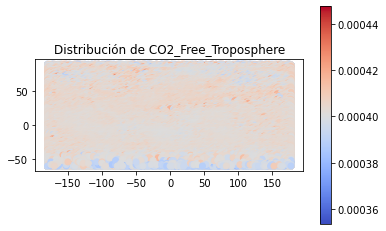

In [20]:
import matplotlib.pyplot as plt
geo_dataframe_completo.plot(column='CO2_Free_Troposphere', cmap='coolwarm', legend=True)
plt.title('Distribución de CO2_Free_Troposphere')
plt.show()


In [28]:
gdf = geo_dataframe_completo.dropna().reset_index()
gdf = gdf.drop(columns=["index"])

In [29]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 876315 entries, 0 to 876314
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Latitude              876315 non-null  float32 
 1   Longitude             876315 non-null  float32 
 2   CO2_Free_Troposphere  876315 non-null  float32 
 3   geometry              876315 non-null  geometry
dtypes: float32(3), geometry(1)
memory usage: 16.7 MB


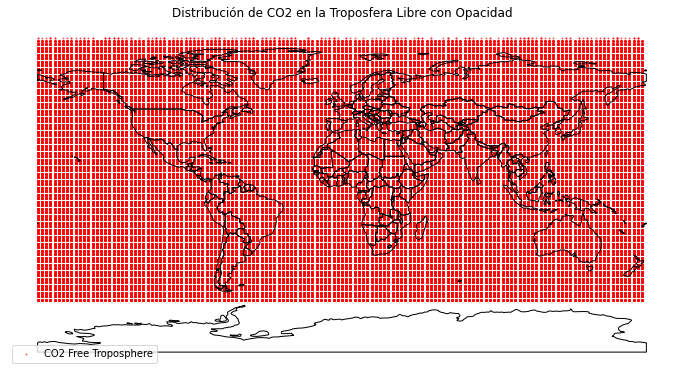

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carga tus datos GeoDataFrame
# Supongamos que tu GeoDataFrame se llama 'gdf'


# Crea una figura de Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Dibuja el mapa del mundo de GeoPandas como fondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Agrega opacidad a los puntos para diferenciar la concentración
gdf.plot(ax=ax, markersize=1, color='red', alpha=0.5, label='CO2 Free Troposphere')

# Personaliza el aspecto del mapa
ax.set_title('Distribución de CO2 en la Troposfera Libre con Opacidad')
plt.axis('off')  # Desactiva los ejes
plt.legend()

# Muestra el mapa con los datos
plt.show()



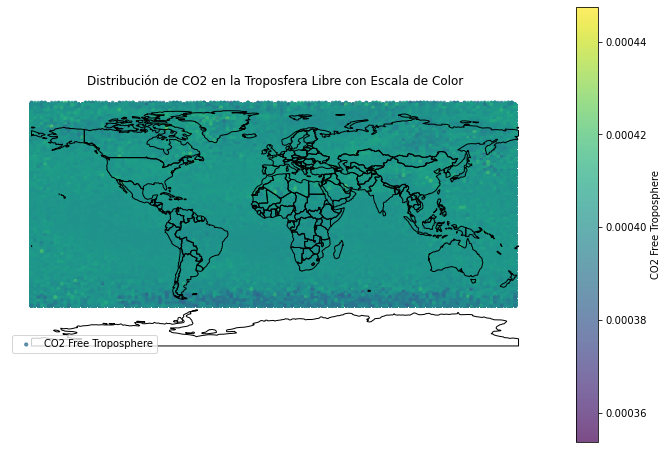

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carga tus datos GeoDataFrame
# Supongamos que tu GeoDataFrame se llama 'gdf'

# Crea una figura de Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Dibuja el mapa del mundo de GeoPandas como fondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Define la variable de interés (por ejemplo, CO2 Free Troposphere)
variable_interes = gdf['CO2_Free_Troposphere']

# Crea una escala de color basada en los valores de la variable
cmap = plt.get_cmap('viridis')  # Puedes elegir otro mapa de colores según tus preferencias
normalize = plt.Normalize(variable_interes.min(), variable_interes.max())

# Dibuja los puntos utilizando la escala de color
sc = plt.scatter(gdf.geometry.x, gdf.geometry.y, c=variable_interes, cmap=cmap, norm=normalize, s=10, alpha=0.7, label='CO2 Free Troposphere')

# Agrega una barra de color para la escala
cbar = plt.colorbar(sc, ax=ax, label='CO2 Free Troposphere')

# Personaliza el aspecto del mapa
ax.set_title('Distribución de CO2 en la Troposfera Libre con Escala de Color')
plt.axis('off')  # Desactiva los ejes

# Muestra el mapa con la escala de color
plt.legend()
plt.show()


In [39]:
# Define el porcentaje de muestra que deseas tomar (en este caso, 30%)
porcentaje_muestra = 0.01

# Toma una muestra aleatoria del 30% de tus datos
muestra = gdf.sample(frac=porcentaje_muestra, random_state=42)  # El argumento random_state asegura reproducibilidad

# Ahora, 'muestra' contiene el 30% de tus datos de forma aleatoria


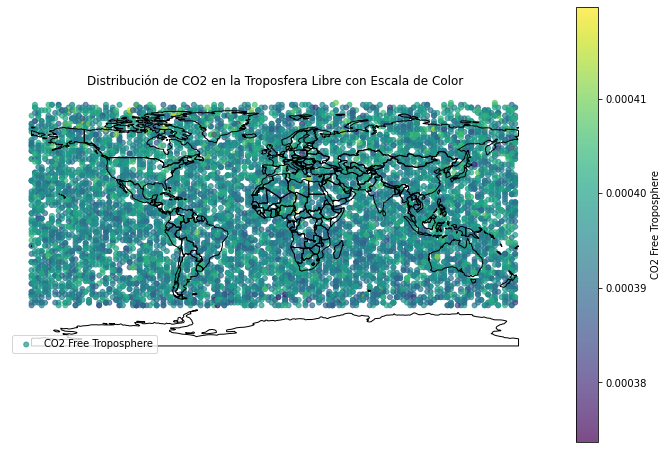

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carga tus datos GeoDataFrame
# Supongamos que tu GeoDataFrame se llama 'gdf'

# Crea una figura de Matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Dibuja el mapa del mundo de GeoPandas como fondo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Define la variable de interés (por ejemplo, CO2 Free Troposphere)
variable_interes = muestra['CO2_Free_Troposphere']

# Crea una escala de color basada en los valores de la variable
cmap = plt.get_cmap('viridis')  # Puedes elegir otro mapa de colores según tus preferencias
normalize = plt.Normalize(variable_interes.min(), variable_interes.max())

# Dibuja los puntos utilizando la escala de color
sc = plt.scatter(muestra.geometry.x, muestra.geometry.y, c=variable_interes, cmap=cmap, norm=normalize, s=25, alpha=0.7, label='CO2 Free Troposphere')

# Agrega una barra de color para la escala
cbar = plt.colorbar(sc, ax=ax, label='CO2 Free Troposphere')

# Personaliza el aspecto del mapa
ax.set_title('Distribución de CO2 en la Troposfera Libre con Escala de Color')
plt.axis('off')  # Desactiva los ejes

# Muestra el mapa con la escala de color
plt.legend()
plt.show()


---